### Visualizing Filters and Feature Maps for Deep Learning

We now have the ability to visualise the filters that Convolutional Neural Networks (CNNs) learn from their training for 
Computer Vision tasks, and the feature maps that the CNN produces when applied to an image.

Visualise the filters and feature maps of a CNN trained for image classification using Keras

### Pick a model to visualize

The easiest way to do this in Keras is to select a pre-trained image classification model. Keras lots of these top-performing
models, All of them were trained on the ImageNet dataset with over a million images.Pick out the VGG16 Model.

When we import the model from keras.applications, Keras will automatically download the weights in the appropriate directory.
We then load the model and print out a summary of its structure.

In [2]:
from keras.applications.vgg16 import VGG16
#Load the model

model=VGG16()


Using TensorFlow backend.


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Visualizing Filters

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
layer_dict=dict([(layer.name,layer) for layer in model.layers])

In [6]:
layer_dict

{'input_1': <keras.engine.input_layer.InputLayer at 0x143c2fedd08>,
 'block1_conv1': <keras.layers.convolutional.Conv2D at 0x143dd0ac548>,
 'block1_conv2': <keras.layers.convolutional.Conv2D at 0x143dd0acc08>,
 'block1_pool': <keras.layers.pooling.MaxPooling2D at 0x143dd0cad88>,
 'block2_conv1': <keras.layers.convolutional.Conv2D at 0x143dd0eb408>,
 'block2_conv2': <keras.layers.convolutional.Conv2D at 0x143dd2fab88>,
 'block2_pool': <keras.layers.pooling.MaxPooling2D at 0x143dd2fdf88>,
 'block3_conv1': <keras.layers.convolutional.Conv2D at 0x143dd300988>,
 'block3_conv2': <keras.layers.convolutional.Conv2D at 0x143dd307548>,
 'block3_conv3': <keras.layers.convolutional.Conv2D at 0x143dd30a548>,
 'block3_pool': <keras.layers.pooling.MaxPooling2D at 0x143dd30dfc8>,
 'block4_conv1': <keras.layers.convolutional.Conv2D at 0x143dd310bc8>,
 'block4_conv2': <keras.layers.convolutional.Conv2D at 0x143dd317788>,
 'block4_conv3': <keras.layers.convolutional.Conv2D at 0x143dd319b88>,
 'block4_poo

In [7]:
layer_dict['block5_conv1']

In [8]:
layer_name='block5_conv1'
filter_index=0 # Which filter in this block we like to visualize
#grab the filters and bias for that layer
filters,bias = layer_dict[layer_name].get_weights()


In [9]:
type(filters)

numpy.ndarray

In [10]:
#Normalize the filters to range 0 and 1 so we can visualize them
f_min,f_max=np.amin(filters),np.amax(filters)

In [11]:
f_min

-0.113298565

In [12]:
f_max

0.1904444

In [13]:
filters = (filters-f_min)/(f_max-f_min)

In [14]:
filters

array([[[[0.37101   , 0.37769344, 0.39714557, ..., 0.3816266 ,
          0.37443548, 0.36331734],
         [0.35700595, 0.37462375, 0.36888897, ..., 0.37681392,
          0.37259048, 0.32054812],
         [0.40004942, 0.3976892 , 0.38763985, ..., 0.3381987 ,
          0.3275626 , 0.366414  ],
         ...,
         [0.3796698 , 0.35378772, 0.36516398, ..., 0.37735143,
          0.3443916 , 0.37030327],
         [0.39915323, 0.34664136, 0.37555456, ..., 0.40297222,
          0.37527433, 0.34053624],
         [0.39707264, 0.3691865 , 0.39002463, ..., 0.36706668,
          0.3727542 , 0.38478735]],

        [[0.36798766, 0.3626128 , 0.38801128, ..., 0.34613183,
          0.3461759 , 0.35380656],
         [0.36899287, 0.35507107, 0.3450437 , ..., 0.37742555,
          0.368437  , 0.31800282],
         [0.36325127, 0.39584613, 0.3914547 , ..., 0.31122038,
          0.35859072, 0.3469171 ],
         ...,
         [0.37075377, 0.36369056, 0.37724566, ..., 0.43437505,
          0.32374972, 0.3

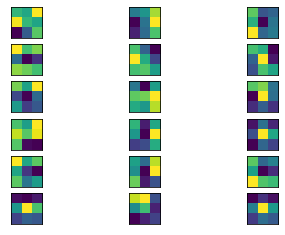

In [15]:
#Plot first few filters
n_filters,index = 6,1
for i in range(n_filters):
    f = filters[:,:,:,i]
    #Plot each channel
    for j in range(3):
        ax=plt.subplot(n_filters,3,index)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(f[:,:,j],cmap='viridis')# yellow represents 1 dark blue represents 0
        index += 1
plt.show()

### Visualizing Feature Maps

The reason for visualising a feature map for a specific input image is to try to gain some understanding of 
what features our CNN detects. It is also interesting to directly observe a common idea in Deep Learning, that the early layers of the network detect low-level features (colours, edges, etc) and the later layers of the network detect high-level features (shapes and objects).

In [16]:
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.vgg16 import VGG16,preprocess_input

In [17]:
model.inputs

[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>]

In [18]:
layer_name='block1_conv2'
model=Model(inputs=model.inputs,outputs=layer_dict[layer_name].output)

In [19]:
#Prepare the image
image=load_img('San06-11-20.jpg',target_size=(224,224))
image=img_to_array(image)
image=np.expand_dims(image,axis=0)
image=preprocess_input(image)

In [20]:
#Apply the model to image
feature_maps=model.predict(image)

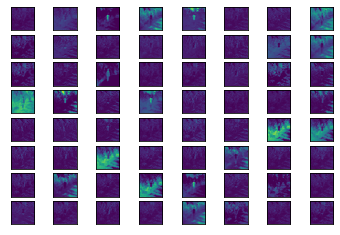

In [21]:
# np.set_printoptions(linewidth=200)
square=8
index=1

for _ in range(square):
    for _ in range(square):
        ax=plt.subplot(square,square,index)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(feature_maps[0,:,:,index-1],cmap='viridis')
        index +=1
plt.show()

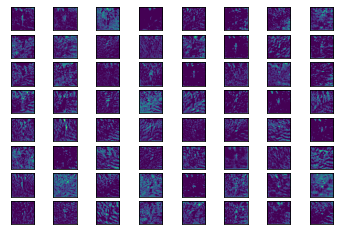

In [22]:
layer_name='block3_conv2'
model=Model(inputs=model.inputs,outputs=layer_dict[layer_name].output)
#Apply the model to image
feature_maps=model.predict(image)

# np.set_printoptions(linewidth=200)
square=8
index=1

for _ in range(square):
    for _ in range(square):
        ax=plt.subplot(square,square,index)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(feature_maps[0,:,:,index-1],cmap='viridis')
        index +=1
plt.show()


In [23]:
from keras.applications.vgg16 import decode_predictions


In [27]:
# load an image from file
image = load_img('Cat.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat,top=1000)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

weasel (35.00%)


In [28]:
label

('n02441942', 'weasel', 0.35001808)

In [32]:
decode_predictions(yhat,top=1000)[0]

[('n02441942', 'weasel', 0.35001808),
 ('n02443484', 'black-footed_ferret', 0.22704609),
 ('n02443114', 'polecat', 0.14525808),
 ('n02098286', 'West_Highland_white_terrier', 0.06715913),
 ('n02120079', 'Arctic_fox', 0.037061214),
 ('n02111889', 'Samoyed', 0.025108412),
 ('n01877812', 'wallaby', 0.020600053),
 ('n02442845', 'mink', 0.016358951),
 ('n02123597', 'Siamese_cat', 0.0078073493),
 ('n02111500', 'Great_Pyrenees', 0.00592491),
 ('n02109961', 'Eskimo_dog', 0.005805366),
 ('n02108915', 'French_bulldog', 0.005380283),
 ('n02110185', 'Siberian_husky', 0.0053727636),
 ('n02114548', 'white_wolf', 0.0033498162),
 ('n01883070', 'wombat', 0.0032805307),
 ('n01819313', 'sulphur-crested_cockatoo', 0.0031060907),
 ('n02104029', 'kuvasz', 0.0029950396),
 ('n02361337', 'marmot', 0.0027225544),
 ('n02346627', 'porcupine', 0.002714574),
 ('n03223299', 'doormat', 0.0026784528),
 ('n02134084', 'ice_bear', 0.0024561994),
 ('n02445715', 'skunk', 0.0023870182),
 ('n01514859', 'hen', 0.0018570307),
 